In [1]:
import numpy as np
from numba import jit
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
S0 = 100
K = 102
N = 4

r = 0.02
u = 1.05
d = 0.98
T = 1/2

# <center> American Option Algorithm </center>

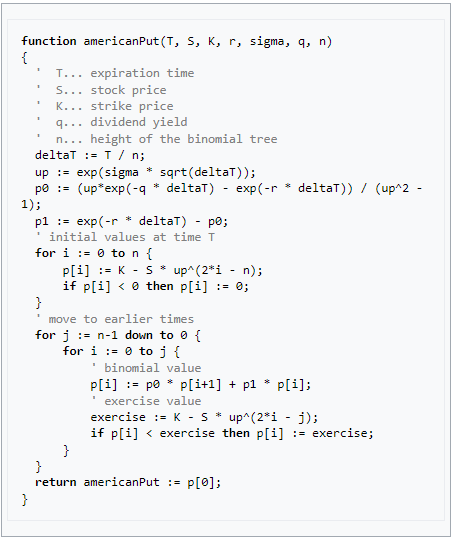

In [3]:
def american_option(T, S, K, r, u, d, N):
        
    # Risk Neutral Probabilities
    p0 = (np.exp(r * T) - d) / (u - d)
    p1 = 1 - p0
    
#     print("Risk Neutral Probability: ", p0)
#     print("\n")
    
    # Height of Binomial Tree
    h = N + 1
    moves = np.zeros(h)
    
    # Store Option Prices
    p = np.zeros(h)
    stockEnd = np.zeros(h)
    
    for i in range(h):
    
        # Initial Values at Time T
        p[i] = K - (S * d**(4 - i) * u**(i))
        moves[i] = S * d**(4 - i) * u**(i)
        
        if p[i] < 0:
            p[i] = 0
            
#     print("Terminal Tree Stock Price: ", moves)
#     print("American Option Price at Terminal Time: ", p)
#     print("\n")
                                
    # Move to Earlier Times
    for j in range(h - 1, 0, -1):
                            
        for k in range(j):
                        
            # Binomial Option Value 
            p[k] = (p0 * p[k + 1]) + (p1 * p[k])
            
            # Compute Exercise Value
            exercise = K - S * d**(4 - j) * u**(j)
            
            if p[k] < exercise:
                p[k] = exercise
                    
    return p

In [4]:
option_prices = american_option(T, S0, K, r, u, d, N)
print("American Option Prices: ", option_prices)

American Option Prices:  [3.17484    0.59016388 0.         0.         0.        ]


## Excel Value: 2.99
## Python Value: 3.17

## These are close. I think there is an error in my python implementation. 

# <center> Compute Optimal Exercise Times </center> 

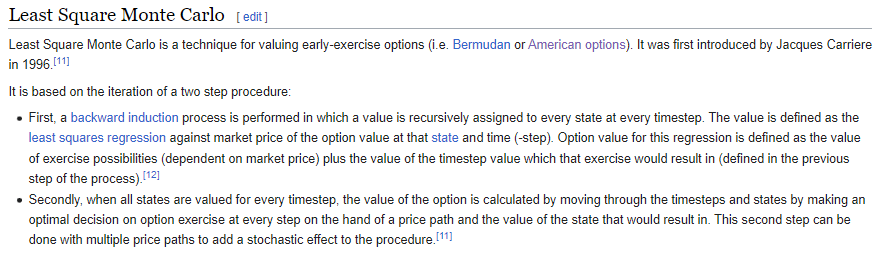

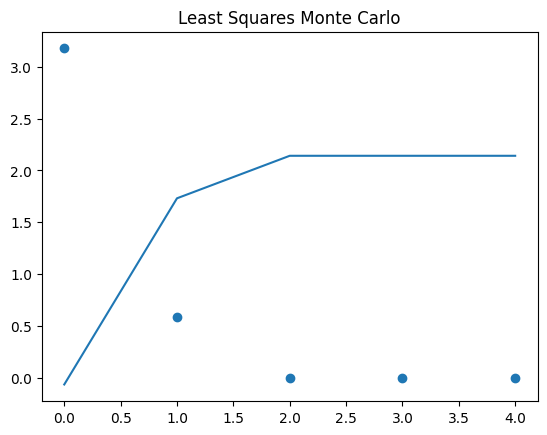

In [5]:
y = american_option(T, S0, K, r, u, d, N)
X = np.array([0, 1, 2, 3, 4])

reg = LinearRegression().fit(X.reshape(-1, 1), y.reshape(-1, 1))

predictions = reg.predict(y.reshape(-1, 1))

plt.scatter(X, y)
plt.title("Least Squares Monte Carlo")
plt.plot(predictions)
plt.show()

In [6]:
K = np.linspace(50, 150, 100)
prices = np.zeros(100)

index = 0
for k in K:
    prices[index] = american_option(T, S0, k, r, u, d, N)[0]
    index += 1

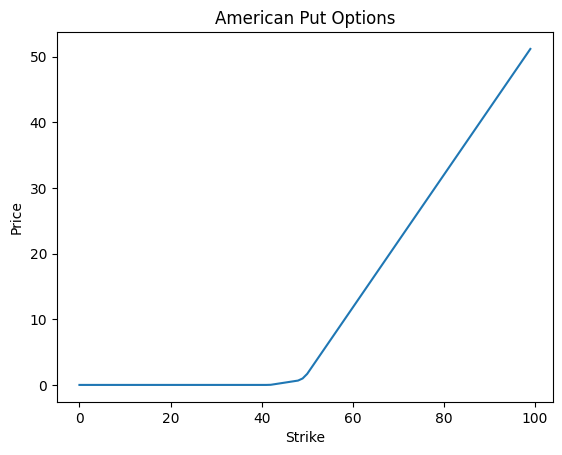

In [7]:
plt.plot(prices)
plt.title("American Put Options")
plt.xlabel("Strike")
plt.ylabel("Price")
plt.show()

# <center> Extra Credit </center>

# <center> American Option With Simulation </center> 

In [8]:
N = 100
T = 1
dt = T / N
sigma = 0.25
stock_process = np.zeros(N)
rv = np.random.normal(0, 1, N)

B = np.cumsum(rv * np.sqrt(dt))
stock_process = 100 * np.exp((r - 0.5 * sigma**2) * dt + sigma * B)

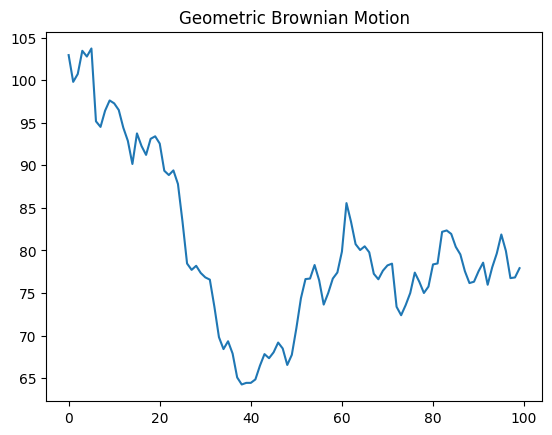

In [9]:
plt.plot(stock_process)
plt.title("Geometric Brownian Motion")
plt.show()

In [10]:
K = 100
prices = np.zeros(100)
T = np.linspace(0, 0.5, N)[::-1]

index = 0
for s in stock_process:
    prices[index] = american_option(T[index], s, K, r, u, d, 4)[0]
    index += 1

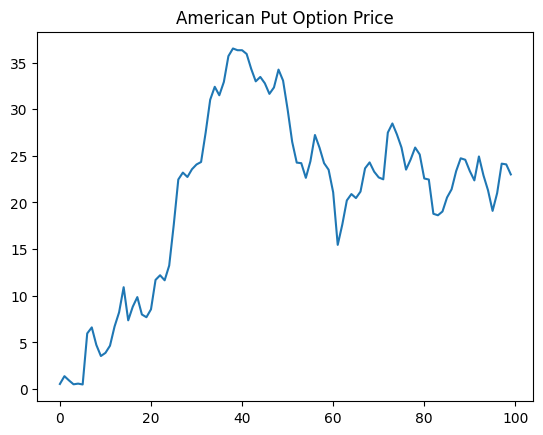

In [11]:
plt.plot(prices)
plt.title("American Put Option Price")
plt.show()